In [ ]:
import sklearn
from sklearn.datasets import make_circles


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch


In [ ]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.05, random_state=42)

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
circles.head()

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0


<function matplotlib.pyplot.show(close=None, block=None)>

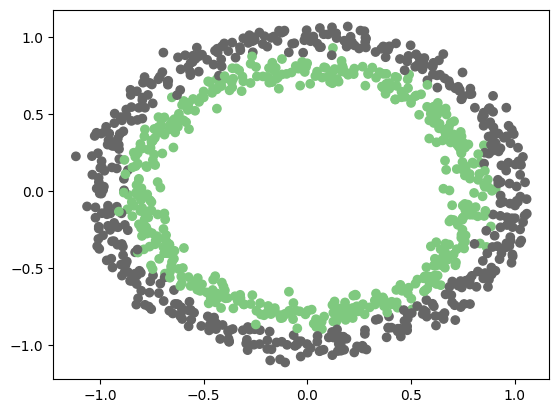

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent_r)
plt.show

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(2,), activation='relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid') ,
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
100/100 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.4787
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4975
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5138
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5075
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6087
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6275
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.7663
Epoch 8/10
100/100 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.7700
Epoch 9/10
100/100 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.8825
Epoch 10/10
100/100 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.9050

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                96        
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 2)                 34        
                                                                 
Total params: 658 (2.57 KB)
Trainable params: 658 (2.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Y_pred = model.predict(X_test)
Y_pred
yp = []
for i in Y_pred:
  if i[0] > i[1]:
    yp.append(0)
  else:
    yp.append(1)
    import numpy as np

7/7 [==============================] - 0s 4ms/step


In [ ]:
y_test


array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

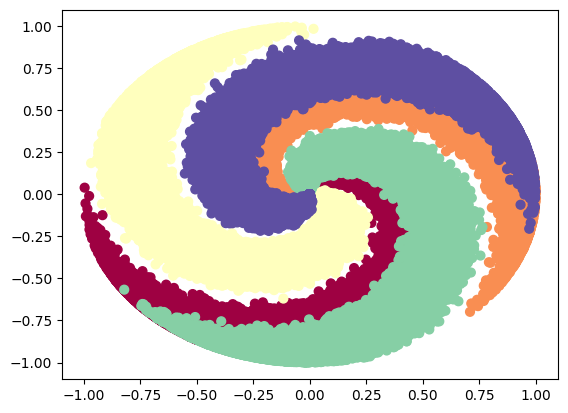

In [ ]:
import numpy as np
N = 100000 # number of points per class
D = 2 # dimensionality
K = 5 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[0]
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(2,), activation='relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(5, activation = 'sigmoid') ,
])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=8)
Y_pred = model.predict(X_test)
Y_pred
max_indices = []
for i in Y_pred:
  max_index = i.argmax()
  max_indices.append(max_index)
# yp will now contain the indices of the maximum values in each sub-array of Y_pred.
yp = max_indices
yp
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, yp)
print("Accuracy:", accuracy)

Epoch 1/10
50000/50000 [==============================] - 99s 2ms/step - loss: 0.4766 - accuracy: 0.8072
Epoch 2/10
50000/50000 [==============================] - 101s 2ms/step - loss: 0.2422 - accuracy: 0.9111
Epoch 3/10
50000/50000 [==============================] - 101s 2ms/step - loss: 0.2208 - accuracy: 0.9167
Epoch 4/10
50000/50000 [==============================] - 95s 2ms/step - loss: 0.2109 - accuracy: 0.9195
Epoch 5/10
50000/50000 [==============================] - 99s 2ms/step - loss: 0.2054 - accuracy: 0.9211
Epoch 6/10
50000/50000 [==============================] - 99s 2ms/step - loss: 0.2014 - accuracy: 0.9218
Epoch 7/10
50000/50000 [==============================] - 94s 2ms/step - loss: 0.1983 - accuracy: 0.9228
Epoch 8/10
50000/50000 [==============================] - 94s 2ms/step - loss: 0.1962 - accuracy: 0.9233
Epoch 9/10
50000/50000 [==============================] - 93s 2ms/step - loss: 0.1945 - accuracy: 0.9241
Epoch 10/10
3125/3125 [==============================

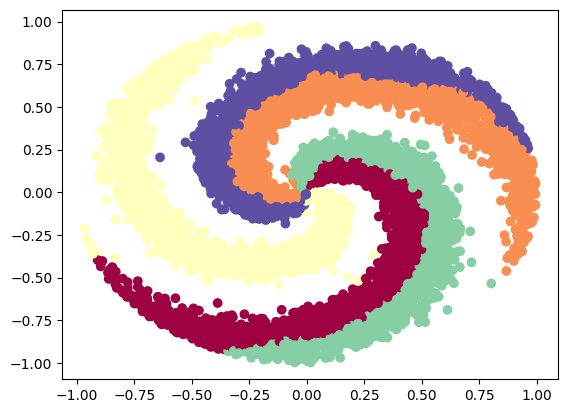

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=yp, cmap=plt.cm.Spectral)
plt.show()